In [29]:
# importing dependencies 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Load the MNIST dataset from the Keras datasets module.

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

**Checking data**

In [31]:
len(x_train)

60000

In [32]:
len(x_test)

10000

In [33]:
x_train[0].shape

(28, 28)

In [34]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [35]:
y_train[0]

5

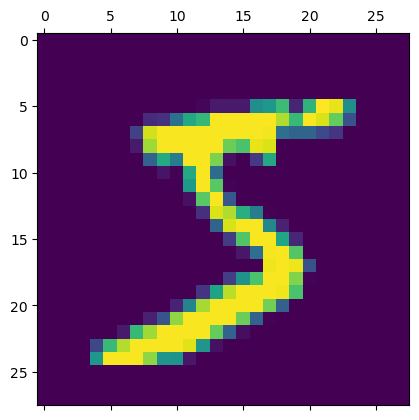

In [36]:
plt.matshow(x_train[0])

**Scaling the data** can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm. 

In [42]:
x_train=x_train/255
x_test=x_test/255

In [43]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

As x_train is 28x28 so we need to Flatten this

In [44]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [45]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

**Flatten layer** If you don't want to Flatten The Data before, then you can do the flattening process in the model by using the flatten layer Before dense Layer

In [46]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
  11/1875 [..............................] - ETA: 9s - loss: 2.1842 - accuracy: 0.2102  

2024-05-01 01:58:14.741761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4669 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3035 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2671 - accuracy: 0.9256


In [62]:
model.evaluate(x_test_flattened,y_test)

 18/313 [>.............................] - ETA: 1s - loss: 0.3088 - accuracy: 0.9236

2024-05-01 02:27:22.296938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3284 - accuracy: 0.9155


[0.32835623621940613, 0.9154999852180481]

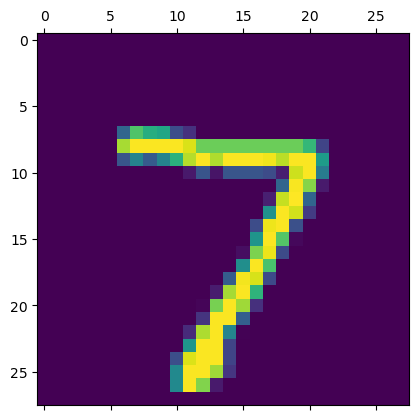

In [49]:
plt.matshow(x_test[0])

In [51]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([2.5833340e-02, 3.1825820e-07, 5.6785282e-02, 9.5734560e-01,
       2.6982503e-03, 1.0308788e-01, 1.7996908e-06, 9.9979001e-01,
       9.5511317e-02, 6.6560453e-01], dtype=float32)

In [52]:
np.argmax(y_pred[0])

7

In [55]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[:5]

[7, 2, 1, 0, 4]

**visualization of all predictions**

For this we'll create confusion matrix using Maths Module in Tensorflow

In [58]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  937,   15,    9,    2,   11,    9,   32,    4],
       [   3,    0,   23,  925,    1,   14,    2,   12,   23,    7],
       [   2,    2,    7,    1,  925,    0,    6,    3,    9,   27],
       [   8,    3,    6,   43,   11,  762,   12,    8,   33,    6],
       [  13,    3,    9,    1,    8,   13,  907,    2,    2,    0],
       [   1,    5,   25,    5,    9,    0,    0,  954,    2,   27],
       [   7,   10,    8,   22,    9,   23,    8,   13,  868,    6],
       [  10,    7,    2,   12,   36,    5,    0,   25,    6,  906]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

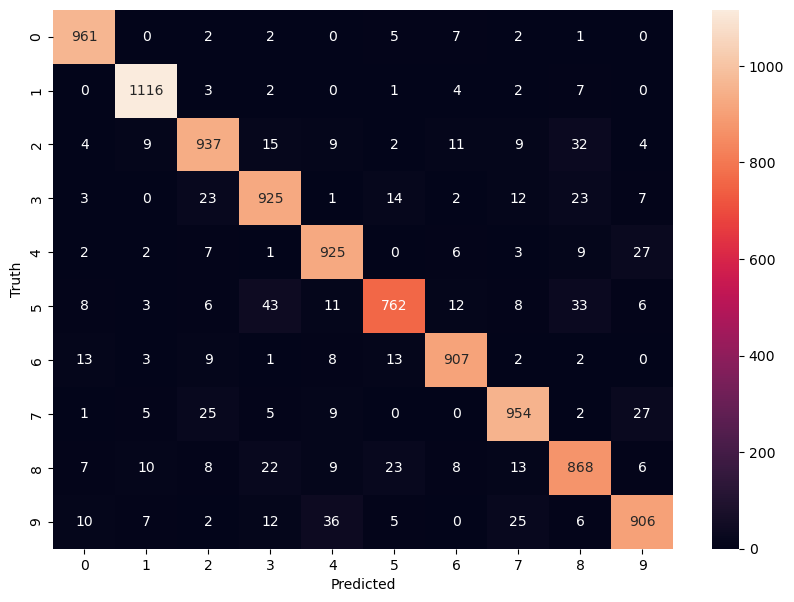

In [60]:
#Confusion Matrix Visualization using seaborn heatmap

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [66]:
# Adding hidden Layer to improve the performance
model = keras.Sequential([

    keras.layers.Dense(50,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
   8/1875 [..............................] - ETA: 13s - loss: 2.1147 - accuracy: 0.2500 

2024-05-01 02:30:35.809250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3805 - accuracy: 0.8936
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2940 - accuracy: 0.9188
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2928 - accuracy: 0.9182
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2954 - accuracy: 0.9180


In [67]:
model.evaluate(x_test_flattened,y_test)

 12/313 [>.............................] - ETA: 1s - loss: 0.2476 - accuracy: 0.9375 

2024-05-01 02:31:43.900502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.2951 - accuracy: 0.9201


[0.2950596809387207, 0.9200999736785889]

Performance improved, but not that much

In [68]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  937,   15,    9,    2,   11,    9,   32,    4],
       [   3,    0,   23,  925,    1,   14,    2,   12,   23,    7],
       [   2,    2,    7,    1,  925,    0,    6,    3,    9,   27],
       [   8,    3,    6,   43,   11,  762,   12,    8,   33,    6],
       [  13,    3,    9,    1,    8,   13,  907,    2,    2,    0],
       [   1,    5,   25,    5,    9,    0,    0,  954,    2,   27],
       [   7,   10,    8,   22,    9,   23,    8,   13,  868,    6],
       [  10,    7,    2,   12,   36,    5,    0,   25,    6,  906]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

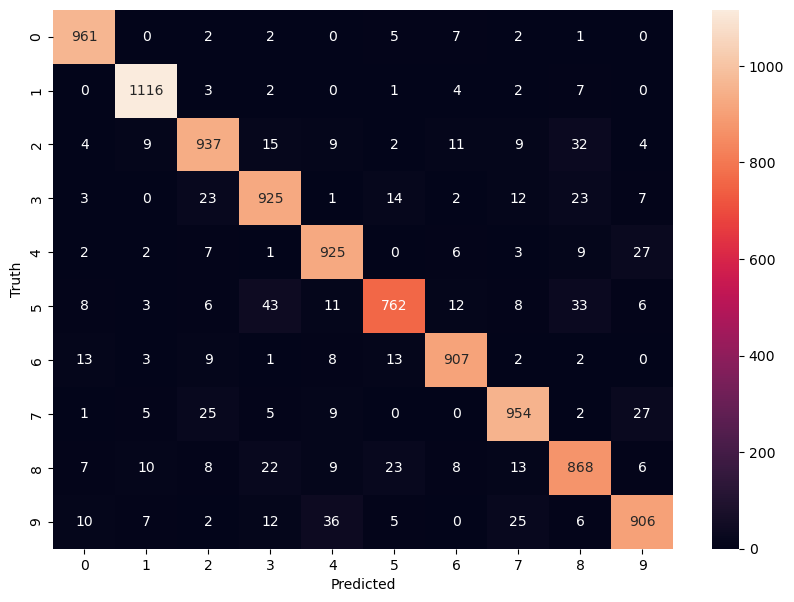

In [69]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")